In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()

In [7]:
x = pd.DataFrame(data = iris.data, columns = iris.feature_names)

In [8]:
x.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
63,6.1,2.9,4.7,1.4
20,5.4,3.4,1.7,0.2
30,4.8,3.1,1.6,0.2
121,5.6,2.8,4.9,2.0
113,5.7,2.5,5.0,2.0
115,6.4,3.2,5.3,2.3
46,5.1,3.8,1.6,0.2
84,5.4,3.0,4.5,1.5
49,5.0,3.3,1.4,0.2
52,6.9,3.1,4.9,1.5


In [9]:
target_names = iris.target_names

In [10]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Text(0, 0.5, 'sepal width')

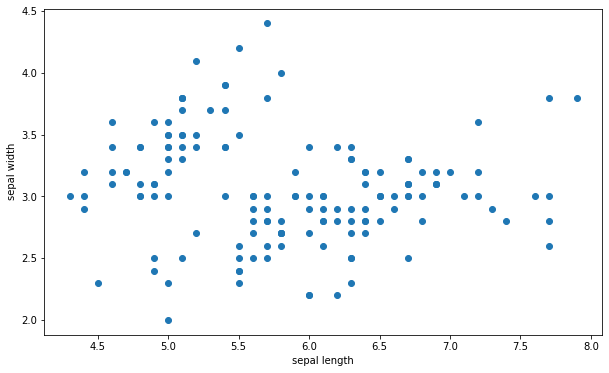

In [13]:
fig, ax = plt.subplots(figsize = (10, 6))

plt.scatter(x['sepal length (cm)'], x['sepal width (cm)'])

plt.xlabel('sepal length')
plt.ylabel('sepal width')

Text(0, 0.5, 'iris type')

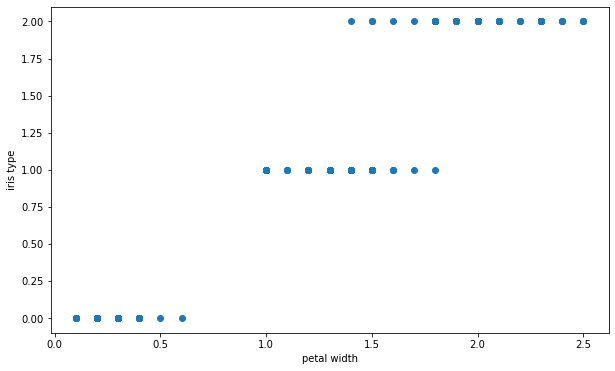

In [14]:
fig, ax = plt.subplots(figsize = (10, 6))

plt.scatter(x['petal width (cm)'], pd.DataFrame(data = y))

plt.xlabel('petal width')
plt.ylabel('iris type')

Text(0, 0.5, 'iris type')

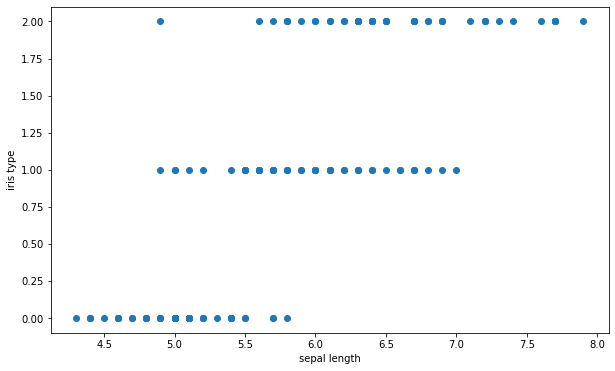

In [15]:
fig, ax = plt.subplots(figsize = (10, 6))

plt.scatter(x['sepal length (cm)'], pd.DataFrame(data = y))

plt.xlabel('sepal length')
plt.ylabel('iris type')

In [16]:
iris_corr = x.corr()

iris_corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

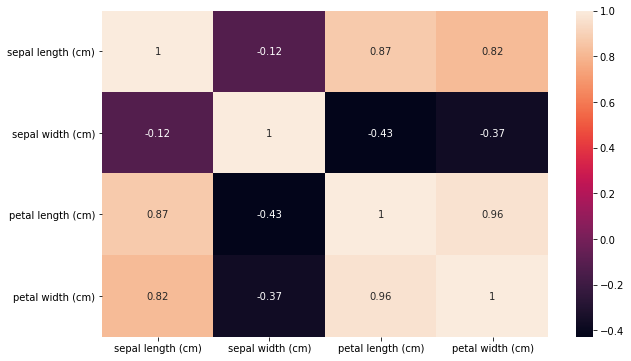

In [19]:
fig, ax = plt.subplots(figsize = (10, 6))

sns.heatmap(iris_corr, annot = True)

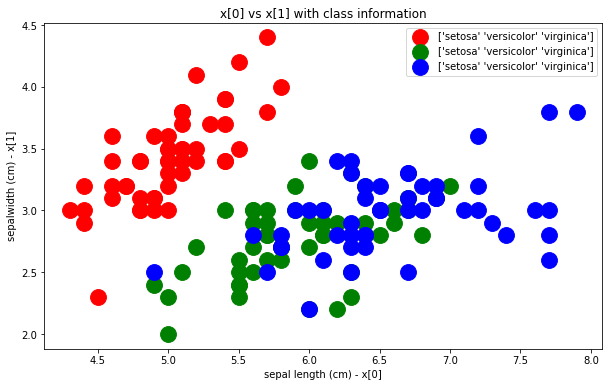

In [21]:
fig, ax = plt.subplots(figsize =(10, 6))

x = np.array(x)

for c, i, target_name in zip('rgb', [0, 1, 2], target_names):
    plt.scatter(x[y == i, 0], x[y == i, 1],c = c, s = 250, label = target_names)
    
    plt.title('x[0] vs x[1] with class information')
    plt.xlabel('sepal length (cm) - x[0]')
    plt.ylabel('sepalwidth (cm) - x[1]')
    plt.legend()

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 2)

In [25]:
x_new = lda.fit_transform(x, y)

In [27]:
lda.explained_variance_ratio_

array([0.9912126, 0.0087874])

In [33]:
x_new = pd.DataFrame(x_new)
x_new.head()

,0,1
0,8.061800,0.300421
1,7.128688,-0.786660
2,7.489828,-0.265384
3,6.813201,-0.670631
4,8.132309,0.514463


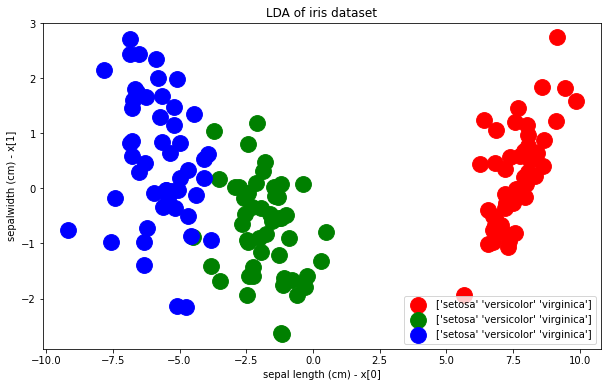

In [34]:
fig, ax = plt.subplots(figsize =(10, 6))

x_new = np.array(x_new)

for c, i, target_name in zip('rgb', [0, 1, 2], target_names):
    plt.scatter(x_new[y == i, 0], x_new[y == i, 1],c = c, s = 250, label = target_names)
    
    plt.title('LDA of iris dataset')
    plt.xlabel('sepal length (cm) - x[0]')
    plt.ylabel('sepalwidth (cm) - x[1]')
    plt.legend()

In [37]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver = 'liblinear', multi_class = 'auto')
model.fit(x, y)
model.score(x, y)

0.96

In [38]:
model = LogisticRegression(solver = 'liblinear', multi_class = 'auto')
model.fit(x_new, y)
model.score(x_new, y)

0.9333333333333333